### You are required to train regression model using ANN by using
dataset from assignment 1,

      
## Without lamda

      
## With lamda
#compare results with multiple linear regression
       
## Further refinements

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Load the dataset
data = pd.read_csv('housing_data.csv')

# Perform one-hot encoding for all categorical variables
data = pd.get_dummies(data, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

# Assuming 'price' is the target variable and the rest are features
X = data.drop('price', axis=1).values
y = data['price'].values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the  regression model
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_scaled, y)

# Define the ANN model without regularization
def build_model_without_reg():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define the ANN model with regularization
def build_model_with_reg(l2_lambda=0.01):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_scaled.shape[1],),
              kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)),
        Dense(32, activation='relu',
              kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the models
model_without_reg = build_model_without_reg()
history_without_reg = model_without_reg.fit(X_scaled, y, epochs=1500, verbose=0)

model_with_reg = build_model_with_reg(l2_lambda=0.01)
history_with_reg = model_with_reg.fit(X_scaled, y, epochs=1500, verbose=0)

# Generate predictions for all models
y_pred_ann_without_reg = model_without_reg.predict(X_scaled)
y_pred_ann_with_reg = model_with_reg.predict(X_scaled)
y_pred_linear = linear_reg_model.predict(X_scaled)

# Calculate MAE and MSE for all models
mae_ann_without_reg = mean_absolute_error(y, y_pred_ann_without_reg)
mae_ann_with_reg = mean_absolute_error(y, y_pred_ann_with_reg)
mae_linear = mean_absolute_error(y, y_pred_linear)

mse_ann_without_reg = mean_squared_error(y, y_pred_ann_without_reg)
mse_ann_with_reg = mean_squared_error(y, y_pred_ann_with_reg)
mse_linear = mean_squared_error(y, y_pred_linear)





18/18 [==============================] - 0s 3ms/step


In [45]:
print("MAE for ANN (Without Regularization):", mae_ann_without_reg)
print("MSE for ANN (Without Regularization):", mse_ann_without_reg)
print("MAE for ANN (With Regularization):", mae_ann_with_reg)
print("MSE for ANN (With Regularization):", mse_ann_with_reg)
print("MAE for  Regression:", mae_linear)
print("MSE for  Regression:", mse_linear)


MAE for ANN (Without Regularization): 826839.5316513762
MSE for ANN (Without Regularization): 1228536689398.7812
MAE for ANN (With Regularization): 800961.9743119266
MSE for ANN (With Regularization): 1163301281261.9978
MAE for  Regression: 775440.3285215875
MSE for  Regression: 1111189043079.4587


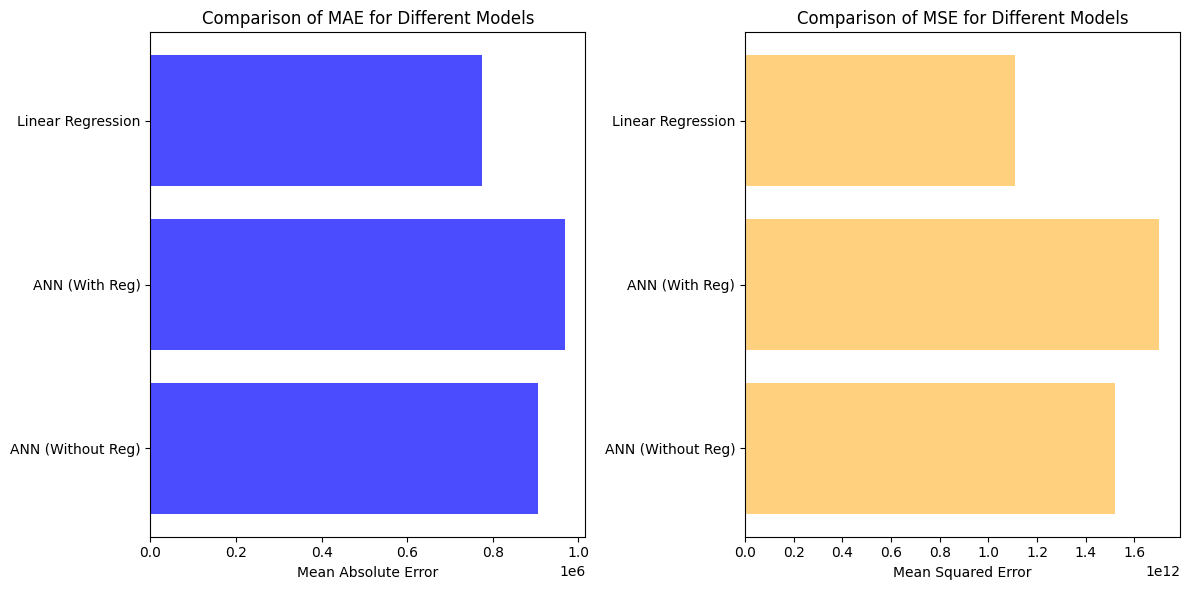

In [44]:
# Create separate bar graphs for MAE and MSE vertically
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot MAE
ax1.barh(models, mae_values, alpha=0.7, color='blue')  # Note the change to barh for horizontal bars
ax1.set_xlabel('Mean Absolute Error')  # Update the label for x-axis
ax1.set_title('Comparison of MAE for Different Models')

# Plot MSE
ax2.barh(models, mse_values, alpha=0.5, color='orange')  # Note the change to barh for horizontal bars
ax2.set_xlabel('Mean Squared Error')  # Update the label for x-axis
ax2.set_title('Comparison of MSE for Different Models')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()




## Further Refinements
 such as tuning hyperparameters or adjusting the architecture of the ANN. Document any changes and their impact on model performance.